Esto es un ejemplo de uso de un NOTEBOOK de JUPITER para que Pedro aprenda cómo debe documentar sus análisis para el TFG.

#### Autor: Prof. Andrés Roldán Aranda
##### Email: amroldan@ugr.es

Fecha: 16/03/2020  en plena crisis del Coronavirus*

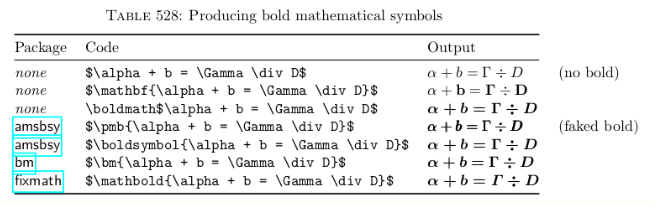

# Visualizing the Earth's dipolar magnetic field

Idea obtenida en esta [URL](https://scipython.com/blog/visualizing-the-earths-magnetic-field/)

The magnetic field due to a magnetic dipole moment, $m$ at a point $r$ relative to it may be written

$
B\left( r \right) = \frac{{\mu _0 }}{{4\pi r^3 }}\left[ {3\hat r(\hat r\cdot m) - m} \right]
$

where $μ_0$ is the [vacuum permeability](https://en.wikipedia.org/wiki/Vacuum_permeability). In geomagnetism, it is usual to write the radial and angular components of B as:

$
B_r  =  - 2B_0 \left( {\frac{{R_E }}{r}} \right)^3 \cos \left( \theta  \right)
$

$
B_\theta   =  - B_0 \left( {\frac{{R_E }}{r}} \right)^3 \sin \left( \theta  \right)
$

$
B_\phi   = 0
$

where $θ$ is polar (colatitude) angle (relative to the magnetic North pole), $ϕ$ is the azimuthal angle (longitude), and $R_E$ is the Earth's radius, about 6370 km. See below for a derivation of these formulae.

With this definition, $B_0$ denotes the magnitude of the mean value of the field at the magnetic equator on the Earth's surface, about 31.2 μT. 
With these definitions, we can plot the dipole component of the Earth's magnetic field as a Matplotlib streamplot. We first construct a meshgrid of (x,y) coordinates and convert them into polar coordinates with the relations:

$
\begin{array}{*{20}c}
   {r = \sqrt {x^2  + y^2 } }  \\
   {\theta  = {\rm atan2}\left( {{\textstyle{{\rm y} \over {\rm x}}}} \right)}  \\
\end{array}
$


where the two-argument arctangent function, **atan2**, is implemented in **NumPy** as *arctan2*. We can then use the formulae above to calculate $B_r$ and $B_θ$ and convert back to Cartesian coordinates to plot the streamplot. The $θ$ coordinate is offset by $α=9.6∘$ to account for the current tilt of the Earth's magnetic dipole with respect to its rotational axis.


# Derivation

For now, consider the dipole to lie along the **y-axis**: $\mathbf{m} = m\cdot\hat j $ and define $B_0$ to be the field perpendicular to $m$ at a distance $R_E$ from it (i.e. on the Earth's magnetic equator):

$
\mathbf{B_0}  = \frac{{\mu _0 m}}{{4\pi R_E^3 }}\hat j = B_0 \hat j
$

Then,

$
\mathbf{B\left( r \right)} =  - B_0 \left( {\frac{{R_E }}{r}} \right)^3 \left[ {3\cos \left( \theta  \right)\hat r - \hat j} \right]
$

The radial component of the magnetic field is therefore

$
B_r  = \mathbf{ B\cdot \hat r }=  - B_0 \left( {\frac{{R_E }}{r}} \right)^3 \left[ {3\cos \left( \theta  \right) - \cos \left( \theta  \right)} \right] =  - 2B_0 \left( {\frac{{R_E }}{r}} \right)^3 \cos \left( \theta  \right)
$

Its angular component is perpendicular to this:

$
B_\theta   = \mathbf{ B\cdot\hat \theta } =  - B_0 \left( {\frac{{R_E }}{r}} \right)^3 \left[ { - \hat j\cdot\hat \theta } \right] =  - B_0 \left( {\frac{{R_E }}{r}} \right)^3 \sin \left( \theta  \right)
$

Finally, $B_ϕ=0$: the field is symmetric about the axis of the dipole.

## Further Reading

1. [Wikipedia article on the dipole model of the Earth's magnetic field])(https://en.wikipedia.org/wiki/Dipole_model_of_the_Earth%27s_magnetic_field)
2. M. Walt, Introduction to Geomagnetically Trapped Radiation (1994), Cambridge University Press.

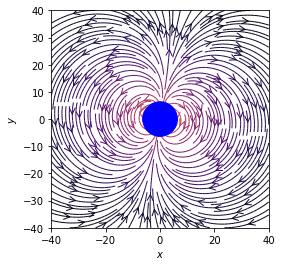

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis
alpha = np.radians(9.6)

def B(r, theta):
    """Return the magnetic field vector at (r, theta)."""
    fac = B0 * (RE / r)**3
    return -2 * fac * np.cos(theta + alpha), -fac * np.sin(theta + alpha)

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, theta = np.hypot(X, Y), np.arctan2(Y, X)

# Magnetic field vector, B = (Ex, Ey), as separate components
Br, Btheta = B(r, theta)
# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(np.pi/2 + theta), np.sin(np.pi/2 + theta)
Bx = -Btheta * s + Br * c
By = Btheta * c + Br * s

fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()